## About the Dataset

This dataset captures details on how **weather-related features** such as temperature, humidity, wind speed, cloud cover, and pressure relate to the likelihood of **rain**. The dataset contains information on weather conditions and is compiled across a period, providing insights into how various weather attributes influence precipitation. The dataset includes **2,500 rows** and **6 columns**.

### Key Information

- **Weather Features**:
  - **Temperature**: The ambient temperature in degrees Celsius.
  - **Humidity**: The percentage of moisture in the air.
  - **Wind Speed**: The speed of the wind in meters per second.
  - **Cloud Cover**: The percentage of sky covered by clouds.
  - **Pressure**: The atmospheric pressure in hectopascals (hPa).

- **Target Variable**:
  - **Rain**: Indicates whether it rained or not (binary classification: "rain" or "no rain").

### Column Descriptions

- **Temperature**: Ambient temperature in degrees Celsius.
- **Humidity**: The percentage of moisture present in the air.
- **Wind Speed**: The speed of wind measured in meters per second.
- **Cloud Cover**: The percentage of sky covered by clouds.
- **Pressure**: The atmospheric pressure recorded in hectopascals.
- **Rain**: The target variable, indicating whether it rained (1) or did not rain (0) based on the weather conditions. 

This dataset can be used to predict the likelihood of rain based on various weather parameters like temperature, humidity, and wind speed, which can be valuable for weather forecasting and climate studies.



In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (10, 6)  
import warnings
warnings.filterwarnings('ignore') 

In [43]:
df = pd.read_csv("weather_forecast_data.csv")
df.head()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,19.096119,71.651723,14.782324,48.699257,987.954760,no rain
1,27.112464,84.183705,13.289986,10.375646,1035.430870,no rain
2,20.433329,42.290424,7.216295,6.673307,1033.628086,no rain
3,19.576659,40.679280,4.568833,55.026758,1038.832300,no rain
4,19.828060,93.353211,0.104489,30.687566,1009.423717,no rain


In [44]:
df.shape

(2500, 6)

In [45]:
print("Dataset Information: \n")
df.info()

Dataset Information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  2475 non-null   float64
 1   Humidity     2460 non-null   float64
 2   Wind_Speed   2468 non-null   float64
 3   Cloud_Cover  2467 non-null   float64
 4   Pressure     2473 non-null   float64
 5   Rain         2500 non-null   object 
dtypes: float64(5), object(1)
memory usage: 117.3+ KB


#### Unique Values and Value Counts

In [46]:
for col in df.select_dtypes(include='object').columns:
    print(f"\nUnique values in {col}:")
    print(df[col].value_counts())


Unique values in Rain:
Rain
no rain    2186
rain        314
Name: count, dtype: int64


# Data Cleaning

In [47]:
# Check for missing values
print("\nMissing Data Check:")
missing_data = df.isnull().sum()
print(missing_data)



Missing Data Check:
Temperature    25
Humidity       40
Wind_Speed     32
Cloud_Cover    33
Pressure       27
Rain            0
dtype: int64


In [48]:
# display rows with missing data
print("\nRows with Missing Data:")
print(df[df.isnull().any(axis=1)])


Rows with Missing Data:
      Temperature   Humidity  Wind_Speed  Cloud_Cover     Pressure     Rain
8             NaN  89.077804    4.842197    83.941093  1029.932706  no rain
25      26.420959  72.283460         NaN     0.812305  1018.818494  no rain
59      11.069078  89.683583    5.804538          NaN   992.303157  no rain
68            NaN  58.981077    6.261278    37.580222  1019.684713  no rain
74      33.078976  81.000650    5.744880    86.933978          NaN  no rain
...           ...        ...         ...          ...          ...      ...
2429          NaN  93.920582   13.302477    90.346087   998.183246     rain
2436    16.838551  86.248171   13.326615          NaN  1004.497445     rain
2445    14.279301        NaN   19.789469    95.934640  1031.653350     rain
2446    13.695217  95.727543         NaN    65.020145   983.800057     rain
2483    17.449257  70.094641         NaN    64.609907  1041.623220     rain

[153 rows x 6 columns]


In [49]:
# Duplicated data
print("Duplicates in df :", df.duplicated().sum())

Duplicates in df : 0


In [50]:
# Print the mean of the numeric columns
print("Dataset Mean Summary: \n")
display(df.select_dtypes(include=['float64']).mean())


Dataset Mean Summary: 



Temperature      22.573777
Humidity         64.366909
Wind_Speed        9.911826
Cloud_Cover      49.808770
Pressure       1014.409327
dtype: float64

In [51]:
# Display the number of unique values in each column of the dataset
print("Unique values in dataset:")
df_unique_counts = df.nunique()
print(df_unique_counts)

Unique values in dataset:
Temperature    2475
Humidity       2460
Wind_Speed     2468
Cloud_Cover    2467
Pressure       2473
Rain              2
dtype: int64


### Apply the two techniques to handle missing data, dropping missing values and replacing them with the average of the feature.

In [52]:
def handle_missing_data(df, method='replace'):
    # Create a copy of the original DataFrame to avoid modifying the original data
    df_copy = df.copy()
    
    if method == 'replace':
        # Replace missing values with the mean of the respective column
        df_copy.fillna(df_copy.select_dtypes(include=['float64']).mean(), inplace=True)
        print("Missing values have been replaced with the mean of each feature.")
        return df_copy
    elif method == 'drop':
        # Drop rows with missing values
        df_copy.dropna(inplace=True)
        print(f"Rows with missing values have been dropped. Remaining rows: {len(df_copy)}.")
        return df_copy
    else:
        print("Invalid method! Please use 'replace' or 'drop'.")
        return df_copy


In [53]:
df_cleaned_using_Replace = handle_missing_data(df, method='replace')

Missing values have been replaced with the mean of each feature.


In [54]:
df_cleaned_using_drop = handle_missing_data(df, method='drop') # original data 2500 row 

Rows with missing values have been dropped. Remaining rows: 2347.


In [55]:
# Check for missing values
print("\nMissing Data Check:")
missing_data = df_cleaned_using_Replace.isnull().sum()
print(missing_data)



Missing Data Check:
Temperature    0
Humidity       0
Wind_Speed     0
Cloud_Cover    0
Pressure       0
Rain           0
dtype: int64


In [56]:
# Check for missing values
print("\nMissing Data Check:")
missing_data = df_cleaned_using_drop.isnull().sum()
print(missing_data)



Missing Data Check:
Temperature    0
Humidity       0
Wind_Speed     0
Cloud_Cover    0
Pressure       0
Rain           0
dtype: int64


In [57]:
# Identifying numerical and non-numerical columns in the dataset
numerical_df = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
non_numerical_df = df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

print("\nNumerical columns in the dataset:")
print(numerical_df)

print("\nNon-numerical columns in the dataset:")
print(non_numerical_df)


Numerical columns in the dataset:
['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure']

Non-numerical columns in the dataset:
['Rain']


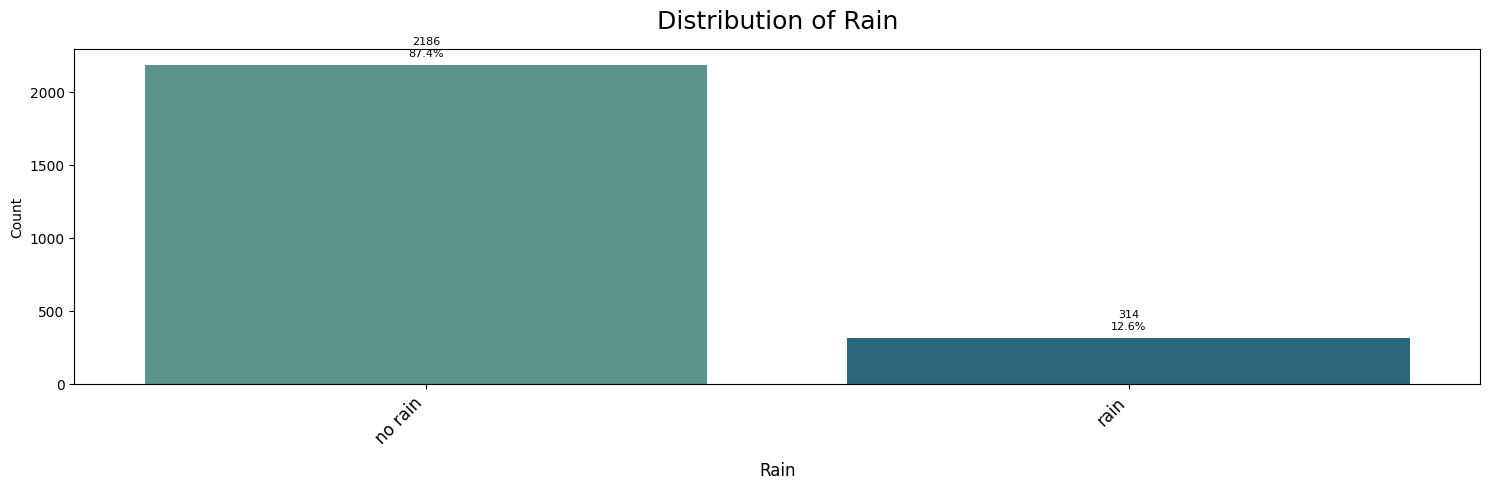

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_bar_graphs(df, columns):
    for column in columns:
        fig, ax = plt.subplots(figsize=(15, 5))

        sns.countplot(x=column, data=df, order=df[column].value_counts().index, ax=ax, palette="crest")

        total = len(df[column])  
        for p in ax.patches:
            count = int(p.get_height())
            percentage = f'{count / total:.1%}'  
            ax.annotate(f'{count}\n{percentage}',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='bottom', fontsize=8, color='black',
                        xytext=(0, 5), textcoords='offset points')

        ax.set_xlabel(column.replace('_', ' ').title(), fontsize=12, labelpad=10)
        ax.set_ylabel('Count', fontsize=10)
        ax.set_title(f'Distribution of {column.replace("_", " ").title()}', fontsize=18, pad=15)

        plt.xticks(rotation=45, ha='right', fontsize=12)
        
        plt.tight_layout()
        plt.show()

# Categorical feature 'Rain' from your dataset
cat_features = ['Rain']

plot_bar_graphs(df, cat_features)


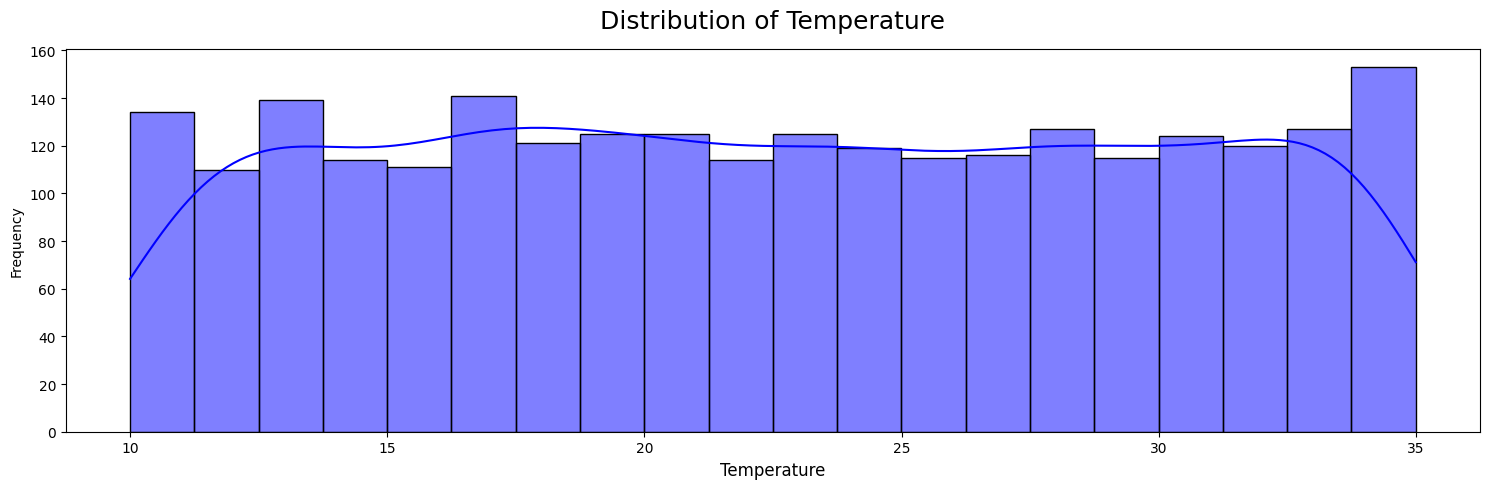

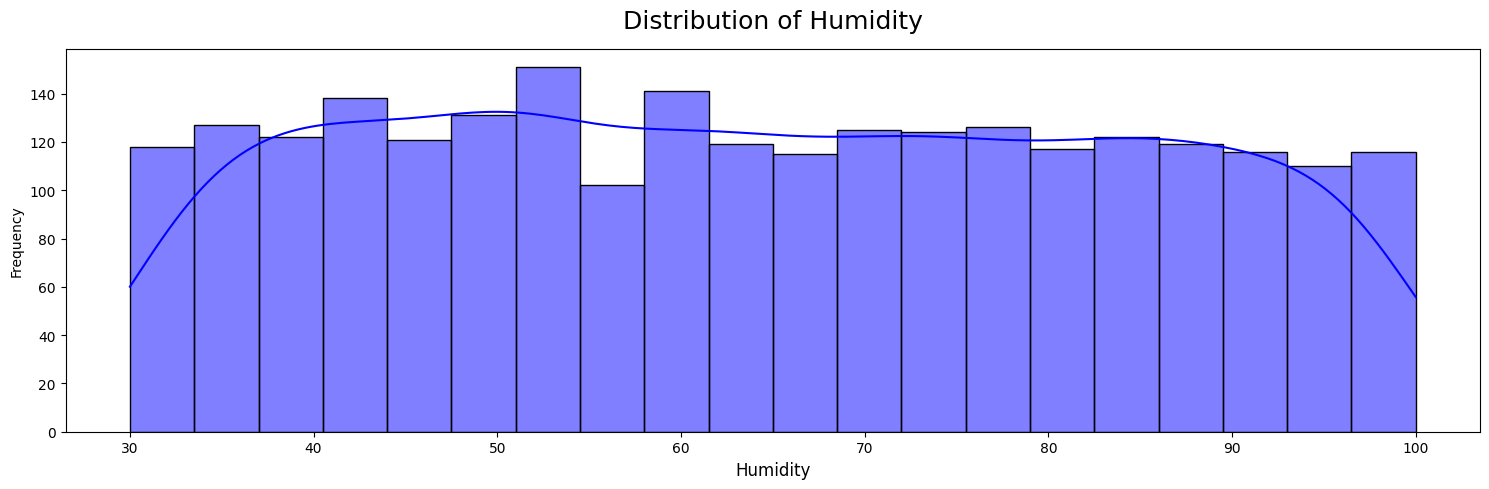

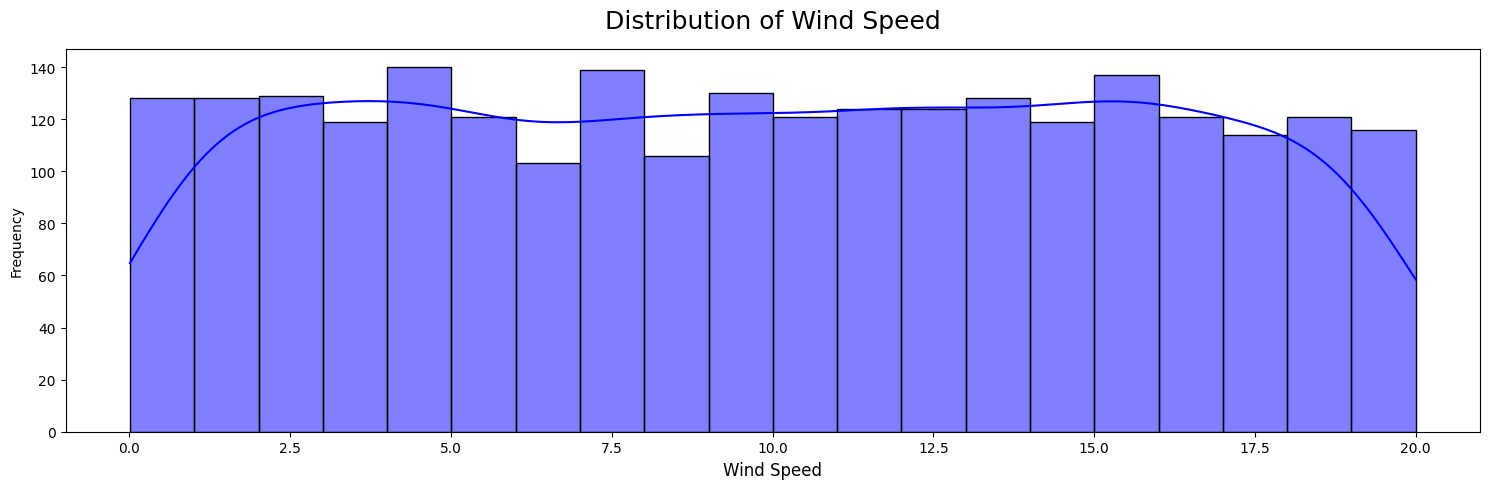

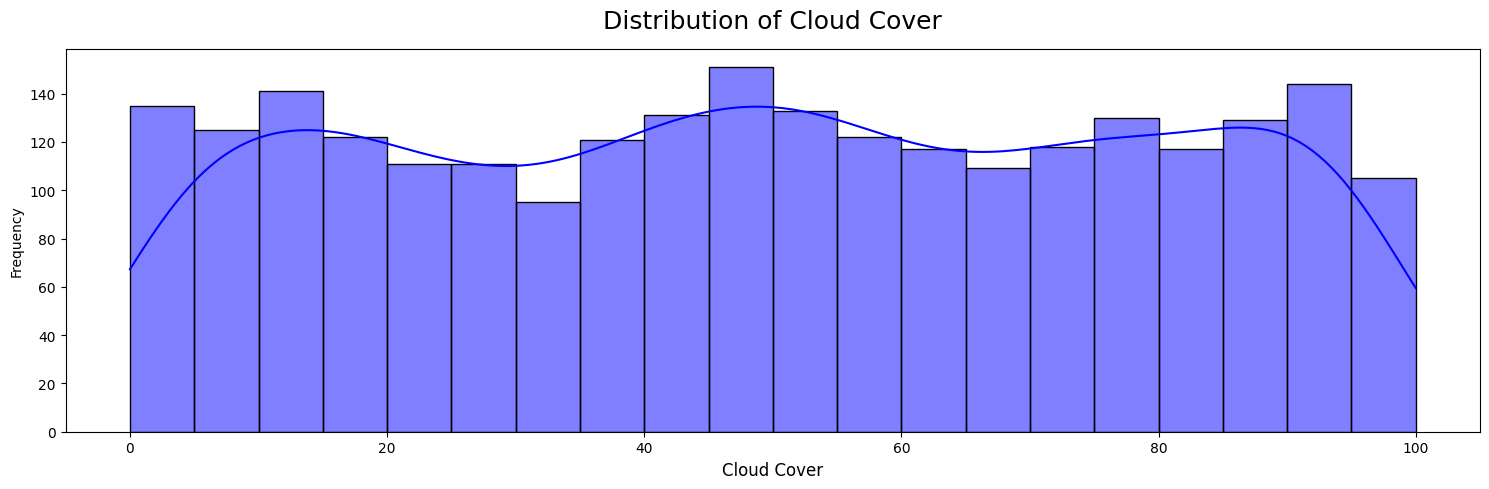

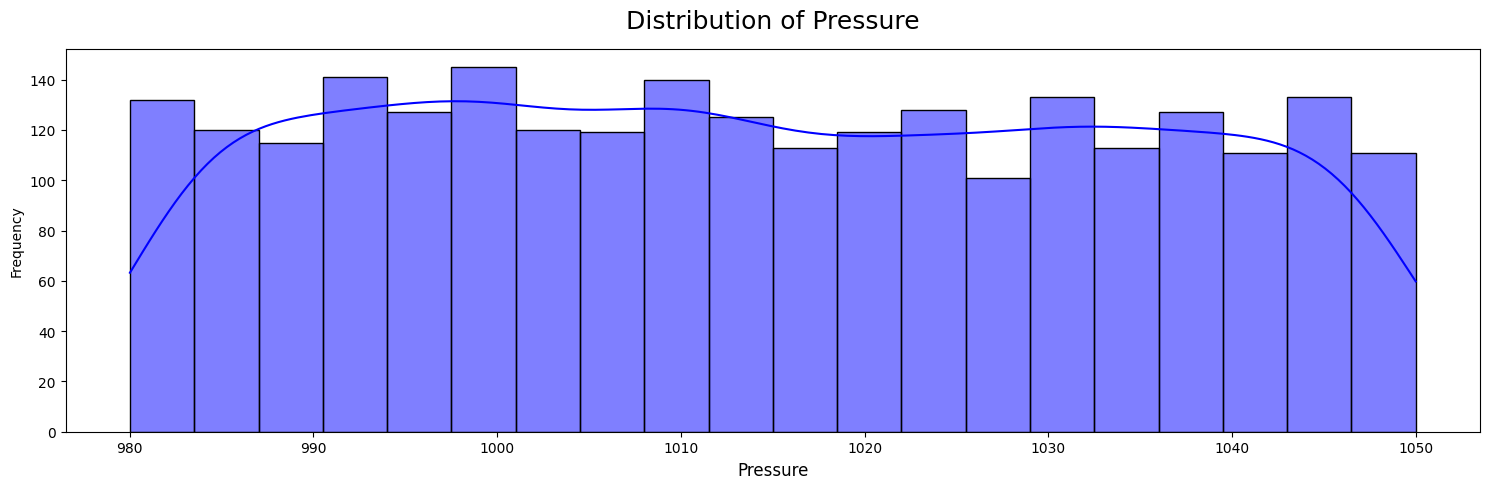

In [59]:
def plot_histograms(df, columns):
    for column in columns:
        fig, ax = plt.subplots(figsize=(15, 5))

        sns.histplot(df[column], kde=True, ax=ax, color="blue", bins=20)  # You can adjust bins for better clarity
        ax.set_xlabel(column.replace('_', ' ').title(), fontsize=12)
        ax.set_ylabel('Frequency', fontsize=10)
        ax.set_title(f'Distribution of {column.replace("_", " ").title()}', fontsize=18, pad=15)

        plt.tight_layout()
        plt.show()

# Numerical features from your dataset
num_features = ['Temperature', 'Humidity', 'Wind_Speed', 'Cloud_Cover', 'Pressure']

plot_histograms(df, num_features)


#### Sperate Data Into Train and Test

In [60]:
from sklearn.model_selection import train_test_split

#Sepearating the features and the targets
X = df_cleaned_using_Replace.drop(columns=['Rain'])  
y = df_cleaned_using_Replace['Rain']   

print("Features : \n")
print(X.head())
print(X.shape)

print("\n Targets :")
print(y.head())
print(y.shape)

Features : 

   Temperature   Humidity  Wind_Speed  Cloud_Cover     Pressure
0    19.096119  71.651723   14.782324    48.699257   987.954760
1    27.112464  84.183705   13.289986    10.375646  1035.430870
2    20.433329  42.290424    7.216295     6.673307  1033.628086
3    19.576659  40.679280    4.568833    55.026758  1038.832300
4    19.828060  93.353211    0.104489    30.687566  1009.423717
(2500, 5)

 Targets :
0    no rain
1    no rain
2    no rain
3    no rain
4    no rain
Name: Rain, dtype: object
(2500,)


In [61]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("Training data shape (X_train): ", X_train.shape)
print("Testing data shape (X_test): ", X_test.shape)
print("Training target shape (y_train): ", y_train.shape)
print("Testing target shape (y_test): ", y_test.shape)

Training data shape (X_train):  (2000, 5)
Testing data shape (X_test):  (500, 5)
Training target shape (y_train):  (2000,)
Testing target shape (y_test):  (500,)


#### Encoding For Target Column

In [65]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

y_train = pd.DataFrame(y_train)  
y_test = pd.DataFrame(y_test)    

y_train['Rain'] = label_encoder.fit_transform(y_train['Rain'])
y_test['Rain'] = label_encoder.transform(y_test['Rain'])


print("\nEncoded Training Target (y_train):")
print(y_train)

print("\nEncoded Test Target (y_test):")
print(y_test)



Encoded Training Target (y_train):
      Rain
2055     0
1961     0
1864     0
2326     1
461      0
...    ...
1638     0
1095     0
1130     0
1294     0
860      0

[2000 rows x 1 columns]

Encoded Test Target (y_test):
      Rain
1447     0
1114     0
1064     0
2287     1
1537     0
...    ...
2375     1
1609     0
596      0
84       0
2213     1

[500 rows x 1 columns]


# check whether numeric features have the same scale


In [67]:
# Basic statistics summary of Numerical features

df_cleaned_using_Replace.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,2500.0,22.573777,7.295628,10.001842,16.417898,22.573777,28.934369,34.995214
Humidity,2500.0,64.366909,19.813325,30.005071,47.493987,64.366909,81.445049,99.997481
Wind_Speed,2500.0,9.911826,5.743575,0.009819,4.829795,9.911826,14.889660,19.999132
Cloud_Cover,2500.0,49.808770,28.869772,0.015038,24.817296,49.808770,74.989410,99.997795
Pressure,2500.0,1014.409327,20.072933,980.014486,997.190281,1014.095390,1031.606187,1049.985593


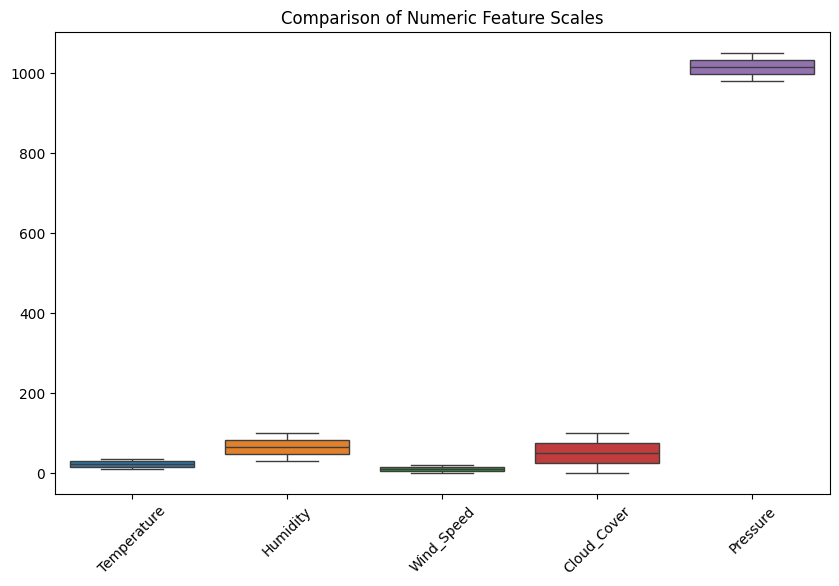

In [69]:
# Boxplot to visualize distributions and scales
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_cleaned_using_Replace.select_dtypes(include='float64'))
plt.xticks(rotation=45)
plt.title("Comparison of Numeric Feature Scales")
plt.show()

### Check whether Numeric Features Have the Same Scale

The numeric features do not appear to be on the same scale. Here’s why:

| Feature      | Mean       | Min        | Max        |
|--------------|------------|------------|------------|
| Temperature  | 22.573777  | 10.001842  | 34.995214  |
| Humidity     | 64.366909  | 30.005071  | 99.997481  |
| Wind_Speed   | 9.911826   | 0.009819   | 19.999132  |
| Cloud_Cover  | 49.808770  | 0.015038   | 99.997795  |
| Pressure     | 1014.409327| 980.014486 | 1049.985593|


The features have different ranges, means, and standard deviations, confirming that they are not on the same scale. This could affect certain analyses and models, especially those sensitive to feature scaling like linear regression. To improve model performance, you might need to normalize or standardize these features to bring them to the same scale.


### Scaling numeric features 


We use **StandardScaler**  to standardize numeric columns in the dataset. Standardization is the process of scaling features so they have a mean of 0 and a standard deviation of 1, which helps algorithms perform better by ensuring that features contribute equally.
The formula for standardization is:

The standardization equation is:

$$
z = \frac{x - \mu}{\sigma}
$$

where:
- $x$ is the original feature value,
- $\mu$ is the mean of the feature in the training set,
- $\sigma$ is the standard deviation of the feature in the training set,
- $z$ is the standardized value.



In [70]:
from sklearn.preprocessing import StandardScaler

numeric_columns = X_train.select_dtypes(include=['float64', 'int64']).columns

scaler = StandardScaler()

X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])

X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

# Display the first few rows of the standardized datasets
print("Standardized Training Data:")
print(X_train.head())

print("\nStandardized Test Data:")
print(X_test.head())


Standardized Training Data:
      Temperature  Humidity  Wind_Speed  Cloud_Cover  Pressure
2055    -1.718125  1.687949    1.697663    -0.229740 -0.142129
1961     0.578604 -1.222505    1.195252     0.013527  1.749370
1864    -1.611123 -1.677586    0.944283    -0.392969  1.456590
2326    -1.293667  0.840139    1.180401     0.752595  0.044229
461     -1.366615  0.086746    0.063829     0.285025 -0.950329

Standardized Test Data:
      Temperature  Humidity  Wind_Speed  Cloud_Cover  Pressure
1447    -0.439931  0.875070   -0.813364    -0.506291 -0.419847
1114    -1.725871 -0.290745   -1.281728    -0.091093 -1.481063
1064     1.166779  1.504868    0.490502    -1.364309  0.767471
2287    -1.184871  1.141692   -0.207549     0.641584  1.570095
1537     1.265119 -1.192291   -0.882951    -1.709711  1.253436


In [71]:
# display the mean and standard deviation after standardization
print("\nMean after Standardization:")
print(X_train[numeric_columns].mean())
print("\nStandard Deviation after Standardization:")
print(X_train[numeric_columns].std())


Mean after Standardization:
Temperature    5.213607e-16
Humidity      -5.311307e-16
Wind_Speed    -6.572520e-17
Cloud_Cover    3.197442e-17
Pressure       2.018830e-15
dtype: float64

Standard Deviation after Standardization:
Temperature    1.00025
Humidity       1.00025
Wind_Speed     1.00025
Cloud_Cover    1.00025
Pressure       1.00025
dtype: float64


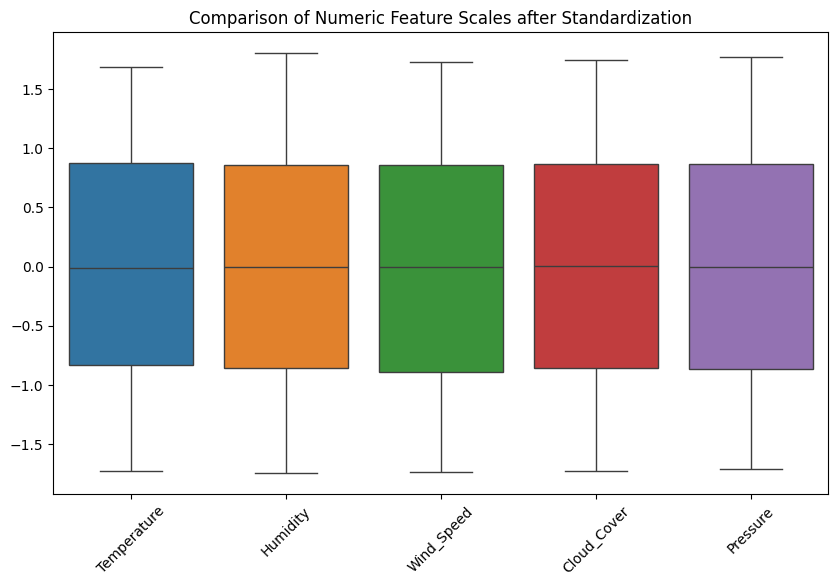

In [73]:
# Boxplot to visualize distributions and scales
plt.figure(figsize=(10, 6))
sns.boxplot(data=X_train.select_dtypes(include='number'))
plt.xticks(rotation=45)
plt.title("Comparison of Numeric Feature Scales after Standardization")
plt.show()

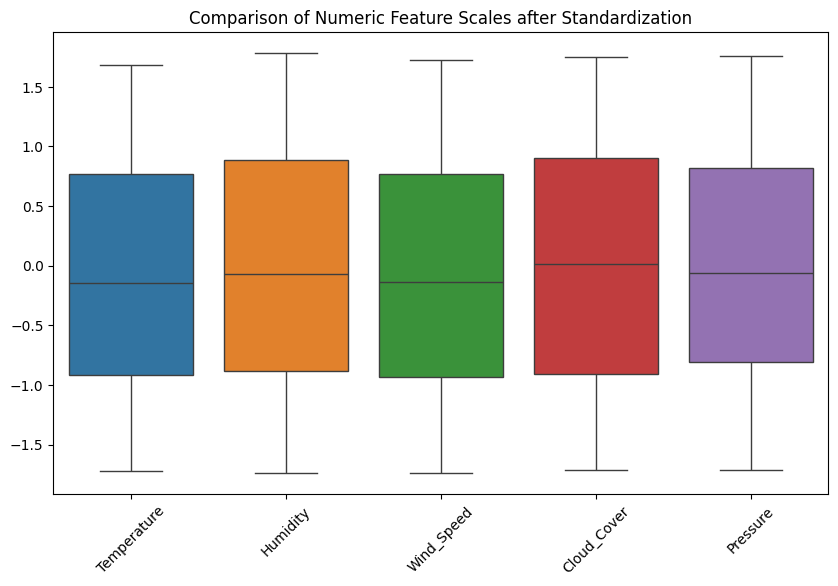

In [74]:
# Boxplot to visualize distributions and scales
plt.figure(figsize=(10, 6))
sns.boxplot(data=X_test.select_dtypes(include='number'))
plt.xticks(rotation=45)
plt.title("Comparison of Numeric Feature Scales after Standardization")
plt.show()